In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('2019.csv')  

In [2]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

 we have no nan values

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [8]:
df1 = df.drop(['Overall rank', 'Country or region'], axis=1)

In [9]:
df1

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [12]:
min(df1.Score), max(df1.Score)   #Between 0 and 10

(2.853, 7.769)

In [36]:
def minmax(df):
    min_col = {}
    max_col = {}
    for col in df:
        max_col[col]= df[col].max()
        min_col[col]= df[col].min()

    result = pd.DataFrame([min_col, max_col], index=['min', 'max'])
    return result


In [37]:
minmax(df1)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
min,2.853,0.000,0.000,0.000,0.000,0.000,0.000
max,7.769,1.684,1.624,1.141,0.631,0.566,0.453


 Our input values must not exceed these. 

In [38]:
from sklearn.linear_model import LinearRegression

In [42]:
y = df1.Score

In [44]:
x = df1.drop('Score', 1)

In [46]:
x = x.to_numpy()

In [48]:
reg = LinearRegression().fit(x, y)

In [50]:
reg.score(x, y)

0.7791638079594221

In [51]:
reg.intercept_

1.7952202293072812

In [53]:
index = reg.predict(np.array([[1.33, 1, 0.77, 0.3, 0.5, 0.21]]))

In [58]:
# Ridge regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=2.0)

In [59]:
clf.fit(x, y)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
clf.score(x,y)

0.7704214447280038

In [61]:
# Kernel Ridge

from sklearn.kernel_ridge import KernelRidge
ker = KernelRidge(alpha=1.0)

In [62]:
ker.fit(x,y)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [63]:
ker.score(x,y)

0.6669204800746369

# Data Analysis:

In [64]:
import seaborn as sns

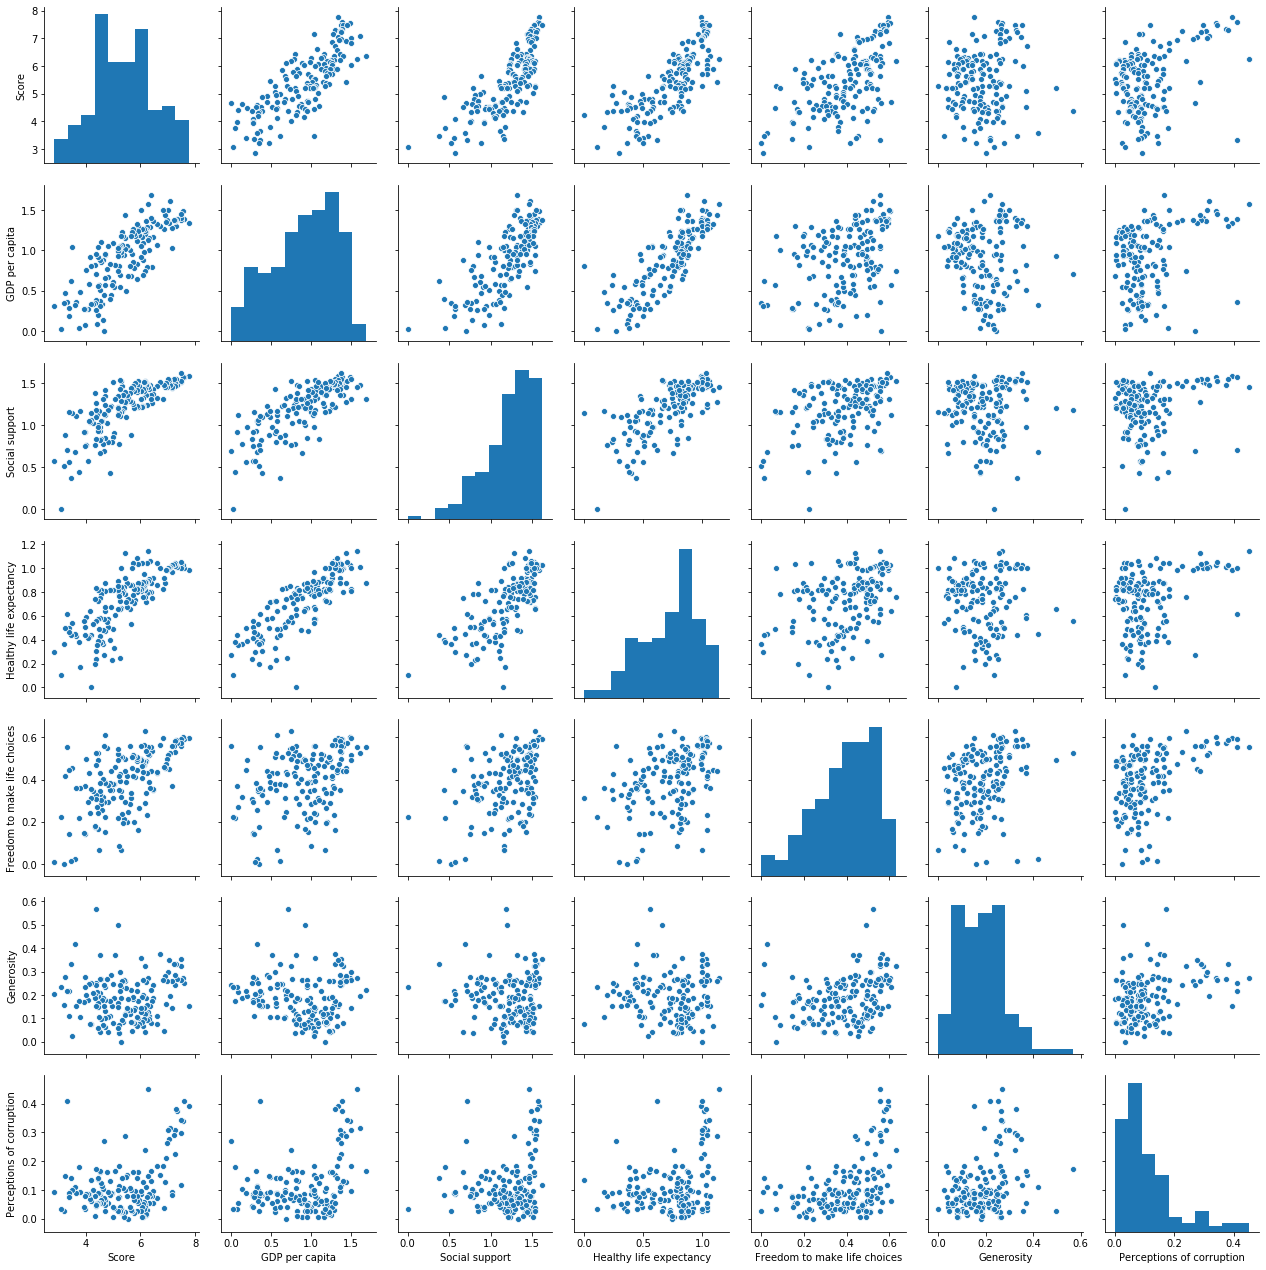

In [65]:
sns.pairplot(df1)

In [66]:
correlation = df1.corr()

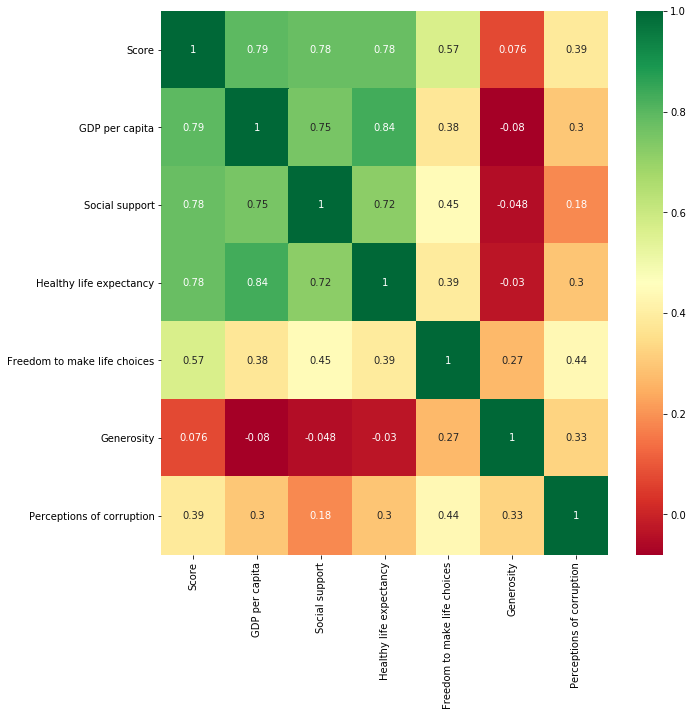

In [73]:
import matplotlib.pyplot as plt
correlation = df1.corr()
corr_elements = correlation.index
plt.figure(figsize= (10,10))
g=sns.heatmap(df[corr_elements].corr(),annot=True,cmap="RdYlGn")

In [75]:
# Extra Trees Regressor"

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
extratrees = ExtraTreesRegressor()
extratrees.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [88]:
extratrees.score(x,y)

1.0

In [77]:
print(extratrees.feature_importances_)

[0.28962696 0.25035024 0.28065304 0.08912269 0.03095001 0.05929706]


In [ ]:
df1 = df1.drop(['Score'], axis = 1)

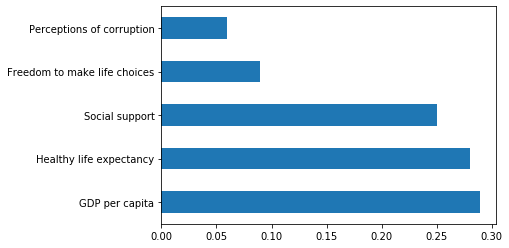

In [87]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(extratrees.feature_importances_, index=df1.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [90]:
# First hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [91]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [92]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [95]:
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [97]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [98]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=500, min_samples_split=100

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.3s
[CV] n_estimators=300, min_samples_split=15, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [99]:
pred = rf_random.predict(X_test)

In [100]:
pred

array([5.60956828, 6.32788979, 6.07184034, 5.3762347 , 6.25423097,
       7.30323321, 5.44815438, 5.70586849, 4.82327065, 6.3452105 ,
       5.37356791, 5.96413235, 4.85300967, 4.28717356, 5.83279859,
       4.84542901, 7.11571818, 4.02657094, 5.52591153, 4.34672763,
       4.28404727, 7.30894797, 4.65844612, 6.02011649, 3.43023726,
       4.60379874, 5.69216433, 5.83588451, 5.51487581, 5.33192046,
       6.92830626, 6.12257156, 5.4997593 , 4.99234455, 5.87332072,
       5.97771956, 3.55872631, 4.83436582, 5.07205636, 5.98358054,
       5.44263555, 3.52754738, 5.87236252, 6.61743673, 5.77156215,
       6.16000671, 5.48437319])

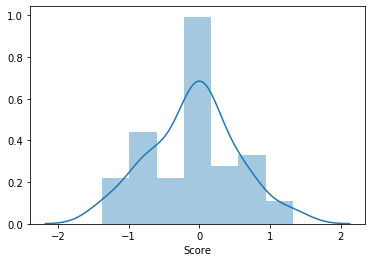

In [101]:
sns.distplot(y_test-pred)

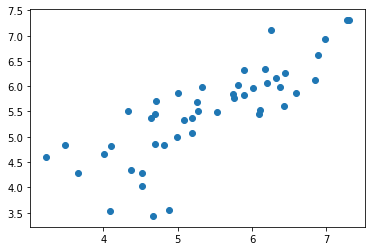

In [102]:
plt.scatter(y_test, pred)

In [104]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.4639139607724261
MSE: 0.37777593034054685
RMSE: 0.6146347942807556


In [105]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)